## Week 2: Re-do initial classification on data 
Shateesh Bhugwansing

This notebook attempts to build a pipeline to use the Naive Bayes classifer on Subject 1, runs 1-4, and of all runs of subject 1 

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn.model_selection import StratifiedKFold, ShuffleSplit, cross_val_score
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn import metrics
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler


import warnings
warnings.simplefilter("ignore", DeprecationWarning)
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.rcParams.update({'font.size': 12})


#import mne to read EEG data 
import mne 
from mne.decoding import Vectorizer, CSP


In [25]:
#read in the data for the first 4 runs of subject 1, and all runs for subject1
path1 = "/Users/shateeshbhugwansing/Desktop/seniorprojecteeg/clean_data_sample/Ex10_Suj1_Run1-epo.fif"
path2 = "/Users/shateeshbhugwansing/Desktop/seniorprojecteeg/clean_data_sample/Ex10_Suj1_Run2-epo.fif"
path3 = "/Users/shateeshbhugwansing/Desktop/seniorprojecteeg/clean_data_sample/Ex10_Suj1_Run3-epo.fif"
path4 = "/Users/shateeshbhugwansing/Desktop/seniorprojecteeg/clean_data_sample/Ex10_Suj1_Run4-epo.fif"
path_all = "/Users/shateeshbhugwansing/Desktop/seniorprojecteeg/clean_data_sample/subject1_all_runs-epo.fif"

run1 = mne.read_epochs(path1, preload=True)
run2 = mne.read_epochs(path2, preload=True)
run3 = mne.read_epochs(path3, preload=True)
run4 = mne.read_epochs(path4, preload=True)
runs_all = mne.read_epochs(path_all, preload=True)

# extract only the event_id's 4-5 for new vs. scrambled 
run1 = run1[(run1.events[:,-1] == 4) | (run1.events[:,-1] == 5)]
run2 = run2[(run2.events[:,-1] == 4) | (run2.events[:,-1] == 5)]
run3 = run3[(run3.events[:,-1] == 4) | (run3.events[:,-1] == 5)]
run4 = run4[(run4.events[:,-1] == 4) | (run4.events[:,-1] == 5)]
runs_all = runs_all[(runs_all.events[:,-1] == 4) | (runs_all.events[:,-1] == 5)]

#store the actual data 
data1 = run1.get_data()
data2 = run2.get_data()
data3 = run3.get_data()
data4 = run4.get_data()
data_all = runs_all.get_data()

#store labels (used as targets in the classifier algorithms)
labels1 = run1.events[:,-1]
labels2 = run2.events[:,-1]
labels3 = run3.events[:,-1]
labels4 = run4.events[:,-1]
labels_all = runs_all.events[:,-1]

Reading /Users/shateeshbhugwansing/Desktop/seniorprojecteeg/clean_data_sample/Ex10_Suj1_Run1-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
280 matching events found
Created an SSP operator (subspace dimension = 1)
280 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Reading /Users/shateeshbhugwansing/Desktop/seniorprojecteeg/clean_data_sample/Ex10_Suj1_Run2-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
285 matching events found
Created an SSP operator (subspace dimension = 1)
285 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection it

### attempt 1:
data: data1
cv: 10-fold CV  
classifier pipeline: vectorizer --> MinMaxScaler --> BernoulliNB  
metric: accuracy

In [10]:
# make pipeline 
clf = make_pipeline(Vectorizer(),
                   StandardScaler(),
                   BernoulliNB())

#cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

preds1 = np.empty(len(labels1))

#fit the classifier + make predictions
for train, test in cv.split(data1, labels1):
    clf.fit(data1[train], labels1[train])
    preds1[test] = clf.predict(data1[test])


print("Attempt1, data1: accuracy (%): ", metrics.accuracy_score(labels1, preds1))
print "Cross Validation Score: ", np.mean(cross_val_score(clf, data1, labels1, cv=cv, n_jobs=1))

('Attempt1, data1: accuracy (%): ', 0.5319148936170213)
Cross Validation Score:  0.5314285714285714


### attempt 2: 
data: data_all  
cv: 10-fold CV  
classifier pipeline: vectorizer --> MinMaxScaler --> BernoulliNB  
metric: accuracy

In [11]:
# make pipeline 
clf = make_pipeline(Vectorizer(),
                   StandardScaler(),
                   BernoulliNB())

#cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

preds_all = np.empty(len(labels_all))

#fit the classifier + make predictions
for train, test in cv.split(data_all, labels_all):
    clf.fit(data_all[train], labels_all[train])
    preds_all[test] = clf.predict(data_all[test])


print("Attempt 2, data_all: accuracy (%): ", metrics.accuracy_score(labels_all, preds_all))
print "Cross Validation Score: ", np.mean(cross_val_score(clf, data_all, labels_all, cv=cv, n_jobs=1))

('Attempt 2, data_all: accuracy (%): ', 0.7414721723518851)
Cross Validation Score:  0.741764638869902


### Attempt 3: 
data: data2  
cv: 10-fold CV  
classifier pipeline: vectorizer -->StandardScaler --> BernoulliNB
metric: accuracy

In [5]:
# make pipeline 
clf = make_pipeline(Vectorizer(),
                   StandardScaler(),
                   BernoulliNB())

#cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

preds2 = np.empty(len(labels2))

#fit the classifier + make predictions
for train, test in cv.split(data2, labels2):
    clf.fit(data2[train], labels2[train])
    preds2[test] = clf.predict(data2[test])


print("Attempt 2, data2: accuracy (%): ", metrics.accuracy_score(labels2, preds2))

('Attempt 2, data2: accuracy (%): ', 0.6180555555555556)


### Attempt 4:
data: data1  
cv: ShuffleSplit  
pipeline: CSP --> BernoulliNB  
metric: accuracy  

In [7]:


#set up pipeline + cross_val_score
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
csp = CSP(n_components=4, reg='ledoit_wolf', norm_trace=False)
bnb = BernoulliNB()
vectorizer = Vectorizer()
scores = []

clf2 = Pipeline([('CSP', csp), ('Vectorizer', vectorizer), ('BernoulliNB', bnb)])
scores = cross_val_score(clf2, data1, labels1, cv=cv, scoring='accuracy', n_jobs=1)
print("Attempt 4: accuracy: ", scores.mean())

('Attempt 4: accuracy: ', 0.5241379310344827)


### Attempt 5:
data: data1  
cv: ShuffleSplit  
pipeline: CSP --> GaussianNB  
metric: accuracy 

In [15]:
scores = []
csp = CSP(n_components=4, reg='ledoit_wolf', norm_trace=False)
scaler = StandardScaler()
gnb = GaussianNB()

cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=42)
clf2 = Pipeline([('CSP', csp), ('StandardScaler', scaler), ('GaussianNB', gnb)])
scores = cross_val_score(clf2, data1, labels1, cv=cv, n_jobs=1)
print(scores.mean()) 

0.5232558139534884


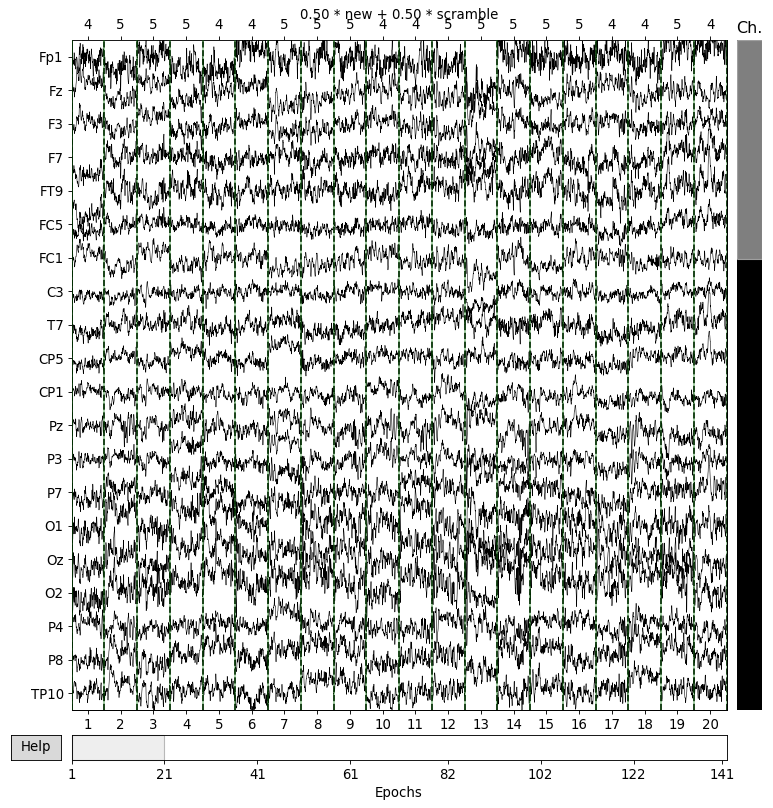

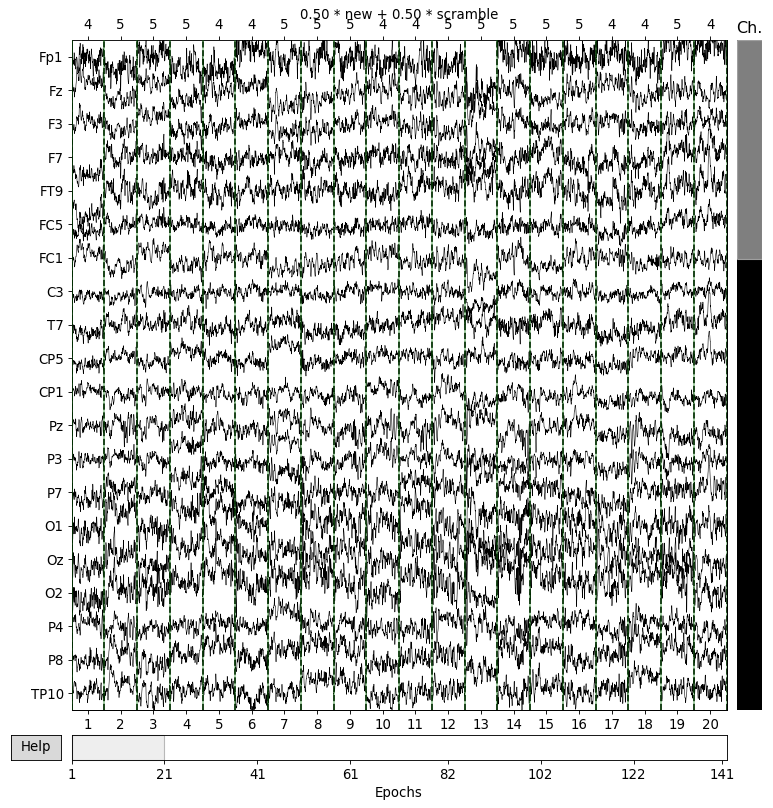

In [26]:
run1.plot()

Shape of original data is:  (141, 61, 1401)
Shape of Vectorized data is:  (141, 85461)


 ...]

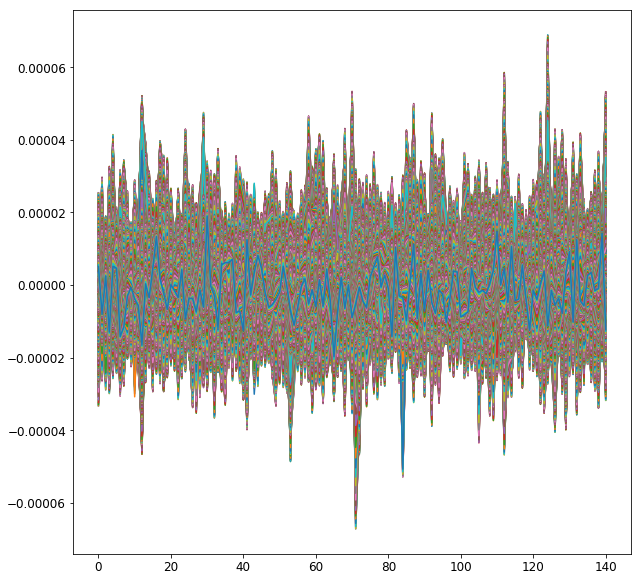

In [36]:
vectorizer = Vectorizer()
print "Shape of original data is: ", data1.shape
new_data = vectorizer.fit_transform(data1)
print "Shape of Vectorized data is: ", new_data.shape
plt.plot(new_data)

### Attempt 6 

Splice the size of each epoch to 0-700ms, 700-1401 ms, in order to have more "runs"  
data: data_all

In [17]:
print data_all.shape
data_all_1 = data_all[:,:,0:700]
data_all_2 = data_all[:,:, 700:1400]
data_all_1 = np.array(data_all_1)
data_all_2 = np.array(data_all_2)
data_all_new = np.concatenate((data_all_1, data_all_2))
print(data_all_new.shape)

(557, 61, 1401)
(1114, 61, 700)


In [30]:
labels_all_new = labels_all
labels_all_new = np.concatenate((labels_all_new, labels_all_new))
print labels_all_new.shape

(1114,)


In [31]:
# make pipeline 
clf = make_pipeline(Vectorizer(),
                   StandardScaler(),
                   BernoulliNB())

#cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

preds_all_new = np.empty(len(labels_all_new))

#fit the classifier + make predictions
for train, test in cv.split(data_all_new, labels_all_new):
    clf.fit(data_all_new[train], labels_all_new[train])
    preds_all_new[test] = clf.predict(data_all_new[test])


print("Attempt 2, data_all: accuracy (%): ", metrics.accuracy_score(labels_all_new, preds_all_new))
print "Cross Validation Score: ", np.mean(cross_val_score(clf, data_all_new, labels_all_new, cv=cv, n_jobs=1))

('Attempt 2, data_all: accuracy (%): ', 0.651705565529623)
Cross Validation Score:  0.6517267754767755
